In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [5]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 541.86it/s]


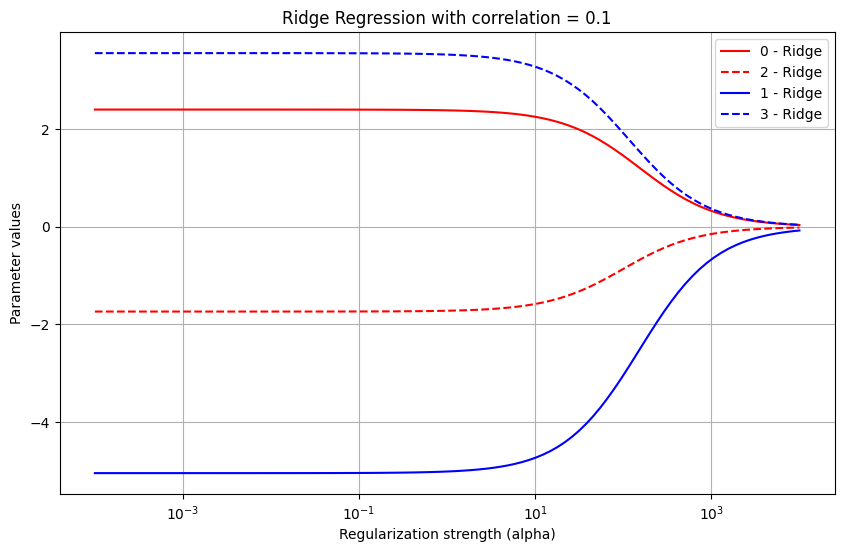

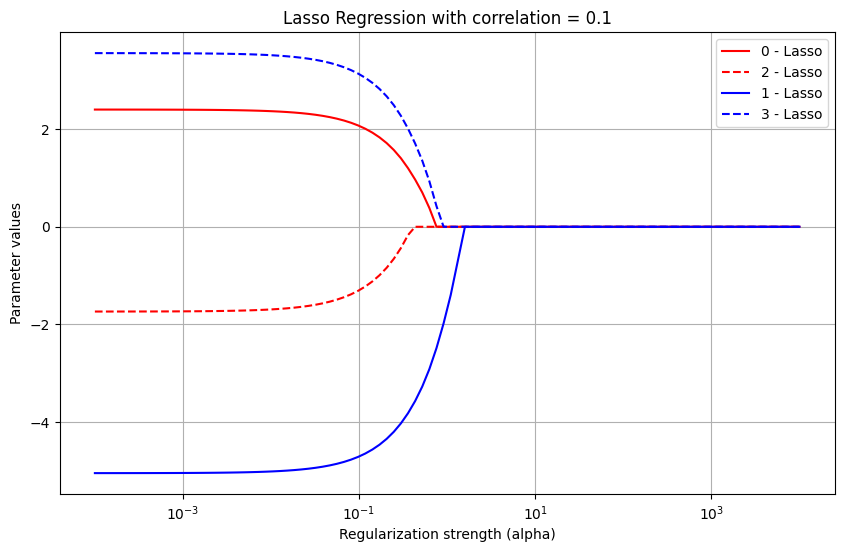

100%|██████████| 100/100 [00:00<00:00, 743.77it/s]


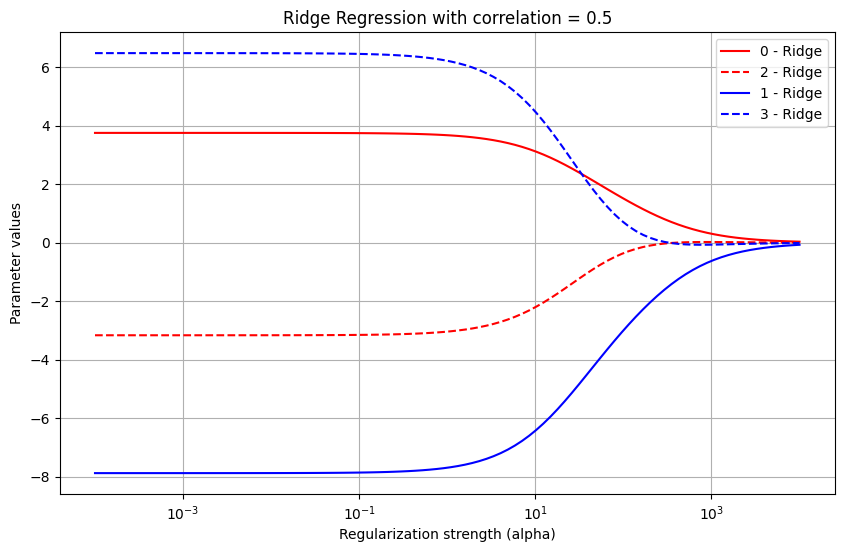

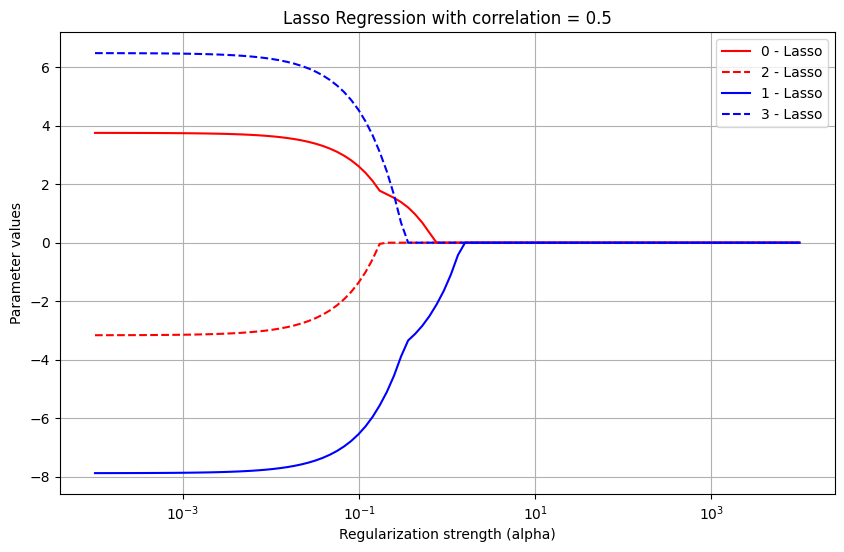

100%|██████████| 100/100 [00:00<00:00, 544.36it/s]


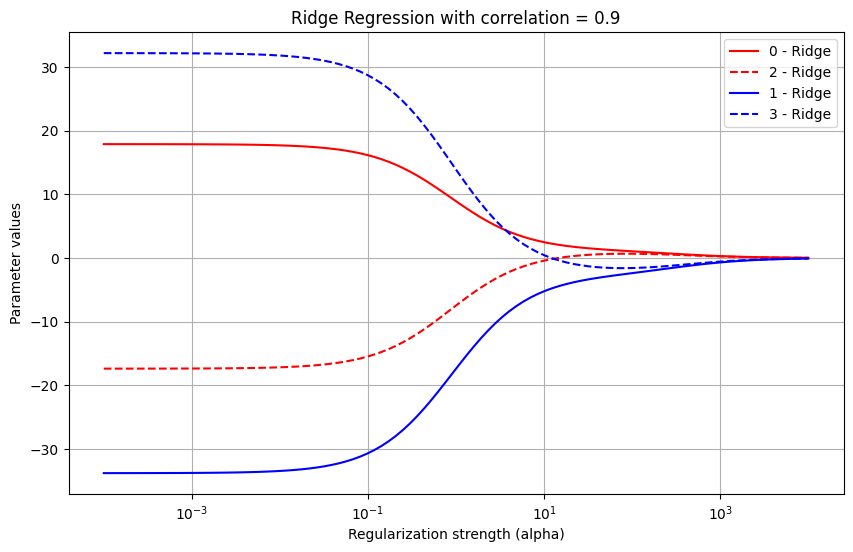

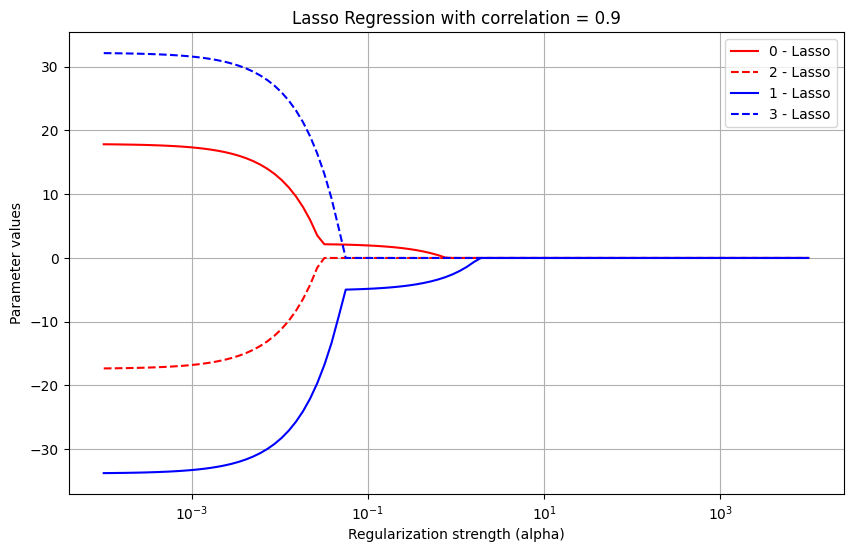

In [6]:
from tqdm import tqdm

# Create a function to fit Ridge and Lasso models
def fit_models(X, y, alpha_values):
    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        # Fit Ridge
        ridge = Ridge(alpha=alpha, fit_intercept=False)
        ridge.fit(X, y)
        params_ridge.append(ridge.coef_)

        # Fit Lasso
        lasso = Lasso(alpha=alpha, fit_intercept=False)
        lasso.fit(X, y)
        params_lasso.append(lasso.coef_)

    return np.array(params_ridge), np.array(params_lasso)

# Define a function to plot the parameters
def plot_params(alpha_values, params_ridge, params_lasso, correlation):
    # For Ridge
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, params_ridge[:, 0], color='red', label='0 - Ridge')
    plt.plot(alpha_values, params_ridge[:, 2], '--', color='red', label='2 - Ridge')
    plt.plot(alpha_values, params_ridge[:, 1], color='blue', label='1 - Ridge')
    plt.plot(alpha_values, params_ridge[:, 3], '--', color='blue', label='3 - Ridge')
    plt.xscale("log")
    plt.title(f'Ridge Regression with correlation = {correlation}')
    plt.xlabel('Regularization strength (alpha)')
    plt.ylabel('Parameter values')
    plt.legend()
    plt.grid(True)
    plt.show()

    # For Lasso
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, params_lasso[:, 0], color='red', label='0 - Lasso')
    plt.plot(alpha_values, params_lasso[:, 2], '--', color='red', label='2 - Lasso')
    plt.plot(alpha_values, params_lasso[:, 1], color='blue', label='1 - Lasso')
    plt.plot(alpha_values, params_lasso[:, 3], '--', color='blue', label='3 - Lasso')
    plt.xscale("log")
    plt.title(f'Lasso Regression with correlation = {correlation}')
    plt.xlabel('Regularization strength (alpha)')
    plt.ylabel('Parameter values')
    plt.legend()
    plt.grid(True)
    plt.show()

alpha_values = np.logspace(-4, 4, 100, base=10)
for correlation in [0.1, 0.5, 0.9]:
    X, y = gen_data(500, correlation)
    params_ridge, params_lasso = fit_models(X, y, alpha_values)
    plot_params(alpha_values, params_ridge, params_lasso, correlation)



##Comment
- For Ridge Regression:

At alpha=0.1, the coefficients are relatively far from zero, suggesting minimal regularization. As alpha increases to 0.5 and 0.9, there's evident shrinkage in the coefficients, with them moving closer to zero. This indicates an increase in regularization strength.
The 1 - Ridge coefficient remains stable across these alpha values, possibly indicating the significance of the associated feature in the model.
The 2 - Ridge coefficient notably decreases as alpha grows, highlighting the sensitivity of this coefficient to regularization.

- For Lasso Regression:

At alpha=0.1, the coefficients are relatively distinct from zero. However, by alpha=0.9, there's a stark change, especially for the 1 - Lasso and 2 - Lasso coefficients, which are pushed to zero. This demonstrates Lasso's feature selection capability.
The 0 - Lasso and 3 - Lasso coefficients maintain their respective positive and negative magnitudes but diminish in size, reflecting the regularization impact.